In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mel.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mel.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mel.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mel.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(1,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_mel=model.fit(X_train, y_train, batch_size=256, epochs=250, validation_data=(X_test, y_test))

Train...
Epoch 1/250
18/18 [==============================] - 10s 107ms/step - loss: 2.2983 - accuracy: 0.1218 - val_loss: 2.2942 - val_accuracy: 0.1051
Epoch 2/250
18/18 [==============================] - 0s 19ms/step - loss: 2.2876 - accuracy: 0.1156 - val_loss: 2.2833 - val_accuracy: 0.1094
Epoch 3/250
18/18 [==============================] - 0s 26ms/step - loss: 2.2720 - accuracy: 0.1209 - val_loss: 2.2679 - val_accuracy: 0.1080
Epoch 4/250
18/18 [==============================] - 0s 21ms/step - loss: 2.2512 - accuracy: 0.1178 - val_loss: 2.2535 - val_accuracy: 0.0943
Epoch 5/250
18/18 [==============================] - 0s 21ms/step - loss: 2.2326 - accuracy: 0.1387 - val_loss: 2.2430 - val_accuracy: 0.1427
Epoch 6/250
18/18 [==============================] - 0s 21ms/step - loss: 2.2195 - accuracy: 0.1565 - val_loss: 2.2318 - val_accuracy: 0.1458
Epoch 7/250
18/18 [==============================] - 0s 19ms/step - loss: 2.2095 - accuracy: 0.1625 - val_loss: 2.2243 - val_accuracy: 0.

18/18 [==============================] - 1s 45ms/step - loss: 2.1249 - accuracy: 0.2054 - val_loss: 2.2099 - val_accuracy: 0.1493
Epoch 59/250
18/18 [==============================] - 1s 39ms/step - loss: 2.1257 - accuracy: 0.2098 - val_loss: 2.2010 - val_accuracy: 0.1812
Epoch 60/250
18/18 [==============================] - 1s 42ms/step - loss: 2.1223 - accuracy: 0.2087 - val_loss: 2.2000 - val_accuracy: 0.1814
Epoch 61/250
18/18 [==============================] - 1s 37ms/step - loss: 2.1221 - accuracy: 0.2125 - val_loss: 2.1991 - val_accuracy: 0.1833
Epoch 62/250
18/18 [==============================] - 1s 37ms/step - loss: 2.1224 - accuracy: 0.2107 - val_loss: 2.2029 - val_accuracy: 0.1732
Epoch 63/250
18/18 [==============================] - 1s 38ms/step - loss: 2.1231 - accuracy: 0.2103 - val_loss: 2.1998 - val_accuracy: 0.1786
Epoch 64/250
18/18 [==============================] - 1s 37ms/step - loss: 2.1224 - accuracy: 0.2109 - val_loss: 2.2009 - val_accuracy: 0.1869
Epoch 65/250

18/18 [==============================] - 1s 36ms/step - loss: 2.1083 - accuracy: 0.2227 - val_loss: 2.2009 - val_accuracy: 0.1892
Epoch 116/250
18/18 [==============================] - 1s 36ms/step - loss: 2.1093 - accuracy: 0.2207 - val_loss: 2.2039 - val_accuracy: 0.1814
Epoch 117/250
18/18 [==============================] - 1s 36ms/step - loss: 2.1086 - accuracy: 0.2203 - val_loss: 2.2089 - val_accuracy: 0.1810
Epoch 118/250
18/18 [==============================] - 1s 37ms/step - loss: 2.1071 - accuracy: 0.2216 - val_loss: 2.1989 - val_accuracy: 0.1833
Epoch 119/250
18/18 [==============================] - 1s 38ms/step - loss: 2.1095 - accuracy: 0.2220 - val_loss: 2.2044 - val_accuracy: 0.1821
Epoch 120/250
18/18 [==============================] - 1s 36ms/step - loss: 2.1075 - accuracy: 0.2265 - val_loss: 2.2022 - val_accuracy: 0.1819
Epoch 121/250
18/18 [==============================] - 1s 35ms/step - loss: 2.1066 - accuracy: 0.2234 - val_loss: 2.2075 - val_accuracy: 0.1817
Epoch 

Epoch 172/250
18/18 [==============================] - 1s 43ms/step - loss: 2.1013 - accuracy: 0.2240 - val_loss: 2.2054 - val_accuracy: 0.1885
Epoch 173/250
18/18 [==============================] - 1s 44ms/step - loss: 2.1008 - accuracy: 0.2232 - val_loss: 2.2092 - val_accuracy: 0.1864
Epoch 174/250
18/18 [==============================] - 1s 44ms/step - loss: 2.1002 - accuracy: 0.2236 - val_loss: 2.2136 - val_accuracy: 0.1852
Epoch 175/250
18/18 [==============================] - 1s 42ms/step - loss: 2.0996 - accuracy: 0.2285 - val_loss: 2.2094 - val_accuracy: 0.1854
Epoch 176/250
18/18 [==============================] - 1s 43ms/step - loss: 2.0992 - accuracy: 0.2252 - val_loss: 2.2138 - val_accuracy: 0.1854
Epoch 177/250
18/18 [==============================] - 1s 41ms/step - loss: 2.0991 - accuracy: 0.2274 - val_loss: 2.2127 - val_accuracy: 0.1847
Epoch 178/250
18/18 [==============================] - 1s 44ms/step - loss: 2.0984 - accuracy: 0.2269 - val_loss: 2.2117 - val_accuracy:

Epoch 229/250
18/18 [==============================] - 1s 45ms/step - loss: 2.0954 - accuracy: 0.2234 - val_loss: 2.2095 - val_accuracy: 0.1857
Epoch 230/250
18/18 [==============================] - 1s 41ms/step - loss: 2.0934 - accuracy: 0.2232 - val_loss: 2.2222 - val_accuracy: 0.1840
Epoch 231/250
18/18 [==============================] - 1s 50ms/step - loss: 2.0943 - accuracy: 0.2209 - val_loss: 2.2299 - val_accuracy: 0.1817
Epoch 232/250
18/18 [==============================] - 1s 47ms/step - loss: 2.0953 - accuracy: 0.2227 - val_loss: 2.2108 - val_accuracy: 0.1864
Epoch 233/250
18/18 [==============================] - 1s 49ms/step - loss: 2.0936 - accuracy: 0.2256 - val_loss: 2.2194 - val_accuracy: 0.1843
Epoch 234/250
18/18 [==============================] - 1s 52ms/step - loss: 2.0942 - accuracy: 0.2205 - val_loss: 2.2120 - val_accuracy: 0.1862
Epoch 235/250
18/18 [==============================] - 1s 61ms/step - loss: 2.0935 - accuracy: 0.2254 - val_loss: 2.2205 - val_accuracy:

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 4s 10ms/step - loss: 2.2117 - accuracy: 0.1854
Pre-training accuracy: 18.5448%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.22360524535179138
Testing Accuracy:  0.18544767796993256


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.18544767796993256


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[7 2 2 ... 2 2 2]


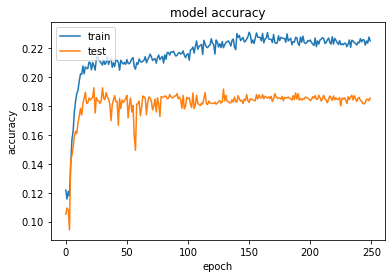

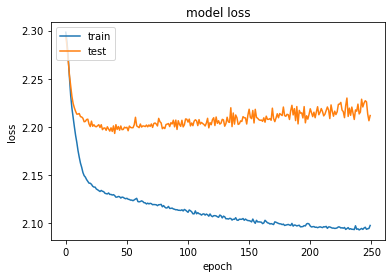

In [14]:
# summarize history for accuracy
plt.plot(model_mel.history['accuracy'])
plt.plot(model_mel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mel.history['loss'])
plt.plot(model_mel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Avg Test accuracy and Standart Devision 

In [16]:
train_hist = pd.DataFrame(model_mel.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.298278,0.121805,2.294208,0.105126
1,2.287626,0.115581,2.283337,0.109379
2,2.272033,0.120916,2.267939,0.107961
3,2.251221,0.117804,2.253537,0.094259
4,2.232575,0.138697,2.242988,0.142688
...,...,...,...,...
245,2.095652,0.222049,2.227116,0.182377
246,2.093525,0.224939,2.225964,0.184503
247,2.094099,0.223383,2.213256,0.184739
248,2.094383,0.227606,2.206340,0.183558


In [17]:
print(train_hist["val_accuracy"].describe())

count    250.000000
mean       0.181605
std        0.011863
min        0.094259
25%        0.181904
50%        0.184503
75%        0.185684
max        0.192535
Name: val_accuracy, dtype: float64


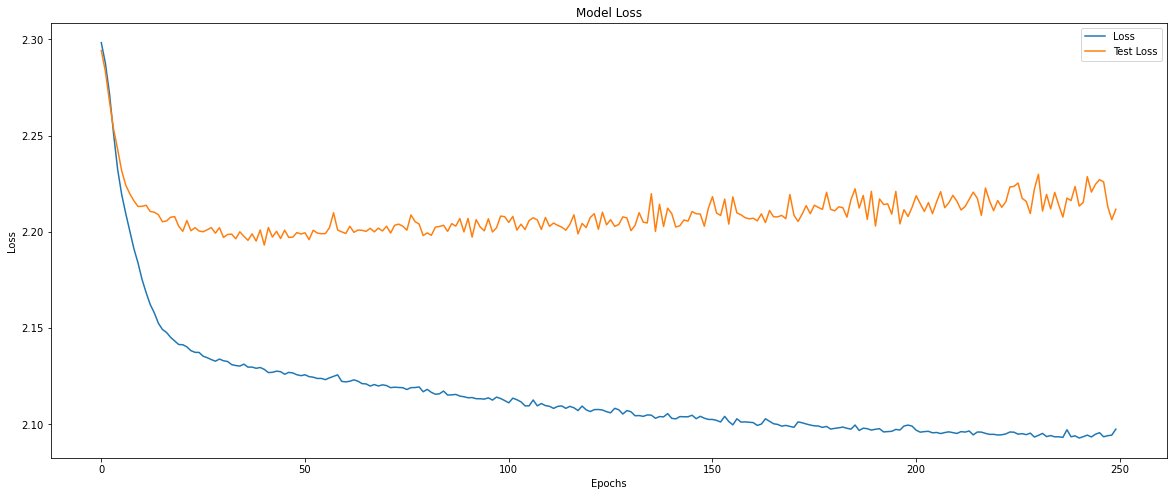

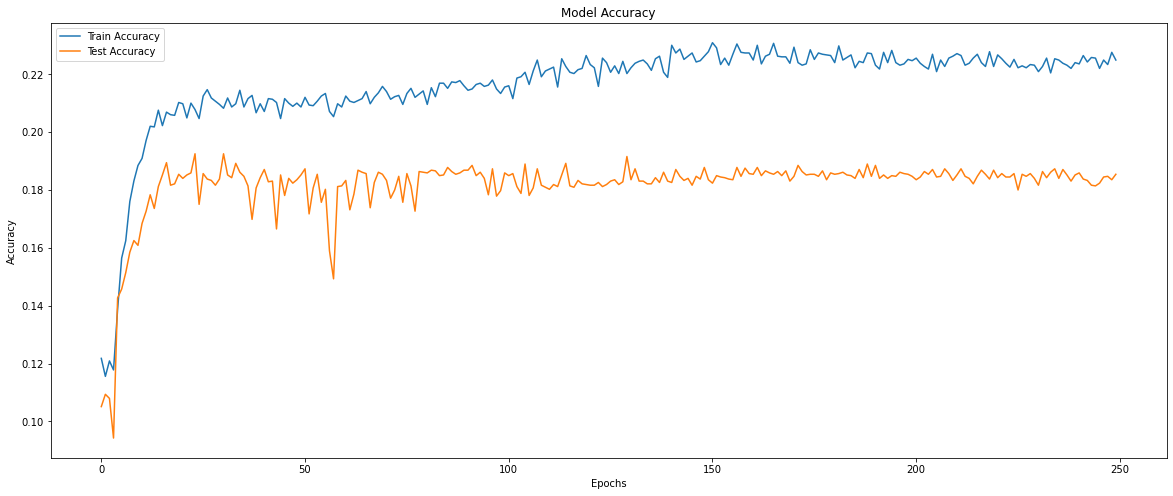

In [18]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 88   0 163   0  38  15   4 191   1   0]
 [ 44   0  39   0  17  19   1  96   5   0]
 [ 36   0 389   0  32   5   3  29   6   0]
 [ 66   0 208   5  39  26   8 121  27   0]
 [111   0 140   1  55  42   3 146   2   0]
 [ 88   0 152  55  38  24  11  65  50   0]
 [ 25   0  41   5   9  15  22  41  26   0]
 [ 70   0 167   0  55   6   0 151   3   0]
 [ 53   0 180   1  29  19  12  48  51   0]
 [ 85   0 132   6  48  46   7 149  27   0]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.13      0.18      0.15       500
           1       0.00      0.00      0.00       221
           2       0.24      0.78      0.37       500
           3       0.07      0.01      0.02       500
           4       0.15      0.11      0.13       500
           5       0.11      0.05      0.07       483
           6       0.31      0.12      0.17       184
           7       0.15      0.33      0.20       452
           8       0.26      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta